In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Read and identify the dataset

raw_data = pd.read_csv('raw-data\\diabetes.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#Clean the dataset

data_edited = raw_data.drop_duplicates() #Remove duplicates
data_edited = data_edited.dropna() #Drop null entries

data_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


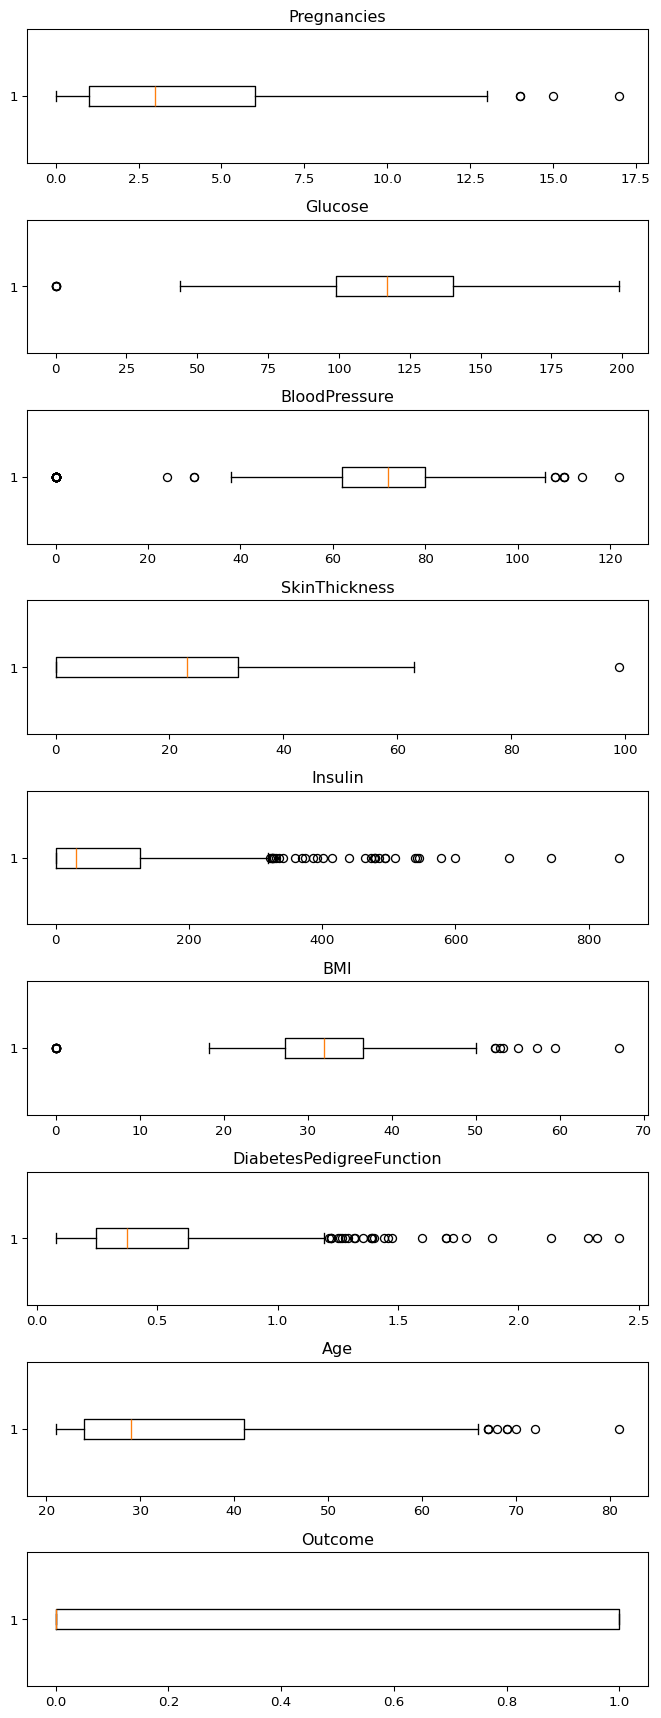

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Visualize data distribution

fig, ax = plt.subplots(len(data_edited.columns), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(data_edited.columns):
    ax[i].boxplot(data_edited[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

data_edited.info()

In [5]:
#Get columns with numerical values

numerial_column_list = data_edited.select_dtypes(include=np.number).columns.tolist()
print(numerial_column_list)

data_edited.info()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Remove outliers

for column in numerial_column_list :
    exec(f"{column}Q1 = np.percentile(data_edited['{column}'],25)")
    exec(f"{column}Q3 = np.percentile(data_edited['{column}'],75)")
    exec(f"{column}IQR = {column}Q3 - {column}Q1")
    exec(f"{column}_upper = {column}Q3 + 1.5*{column}IQR")
    exec(f"{column}_lower = {column}Q1 - 1.5*{column}IQR")

for column in numerial_column_list :
    exec(f"data_edited = data_edited[(data_edited['{column}'] >= {column}_lower) & (data_edited['{column}'] <= {column}_upper)]")
    exec(f"del {column}Q1, {column}Q3, {column}IQR, {column}_upper, {column}_lower")

data_edited = data_edited.reset_index(drop=True)

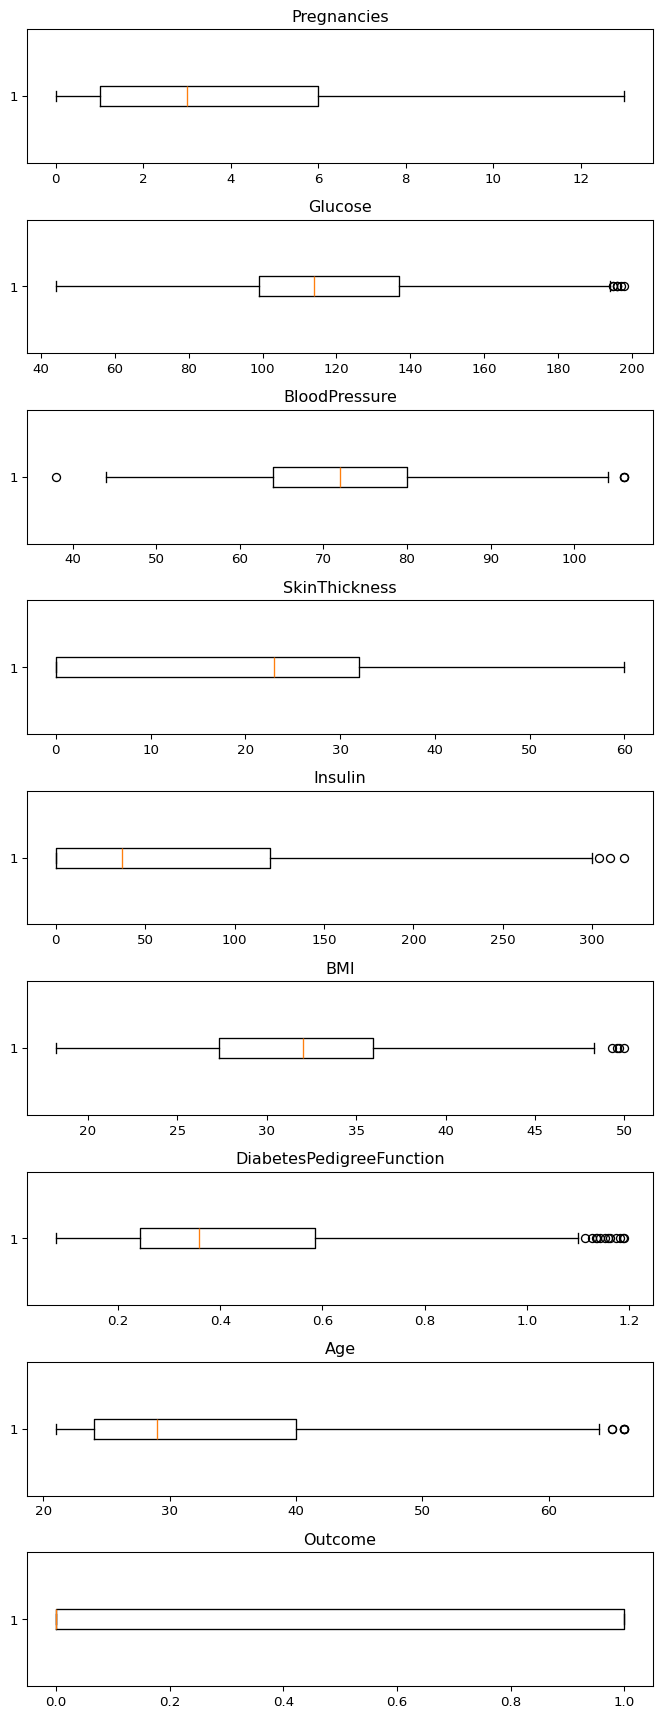

In [7]:
#Visualize data distribution after removing outliers

fig, ax = plt.subplots(len(data_edited.columns), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(data_edited.columns):
    ax[i].boxplot(data_edited[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

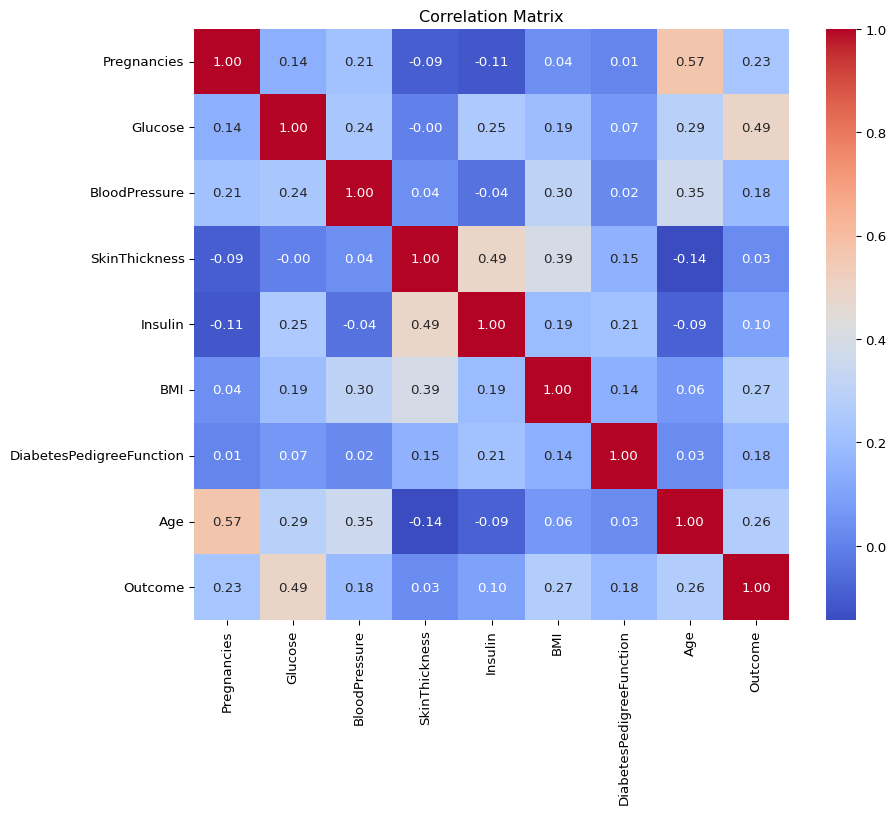

In [8]:
#Correlation Matrix

corr = data_edited.corr()
plt.figure(figsize=(10, 8), dpi=96)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Outcome
0    439
1    200
Name: count, dtype: int64


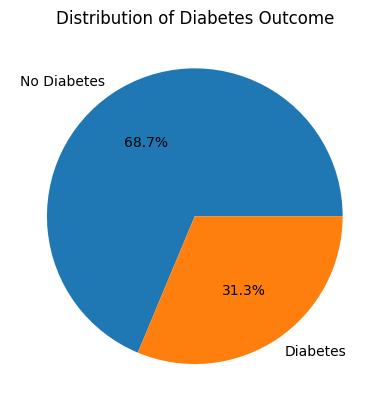

In [9]:
#Pie diagram for output

#Ensure correct labels
label_list = ['Diabetes','No Diabetes']
count_0 = data_edited['Outcome'].value_counts().get(0)
count_1 = data_edited['Outcome'].value_counts().get(1)
if count_0 > count_1:
    label_list.reverse()

plt.pie(data_edited['Outcome'].value_counts(), labels=label_list, autopct='%1.1f%%')
print(data_edited['Outcome'].value_counts())
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [10]:
#Feature scaling

for column in numerial_column_list:
    exec(f"data_edited['{column}'] = data_edited['{column}']/data_edited['{column}'].max()")

data_edited.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.747475,0.679245,0.583333,0.000000,0.672,0.526448,0.757576,1.0
1,0.076923,0.429293,0.622642,0.483333,0.000000,0.532,0.294710,0.469697,0.0
2,0.615385,0.924242,0.603774,0.000000,0.000000,0.466,0.564232,0.484848,1.0
3,0.076923,0.449495,0.622642,0.383333,0.295597,0.562,0.140218,0.318182,0.0
4,0.384615,0.585859,0.698113,0.000000,0.000000,0.512,0.168766,0.454545,0.0


In [11]:
#Save to a csv file

data_edited.to_csv('edited-data\\diabetes_scaled.csv', index=False)